# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "../Downloads/Homework_05-Matplotlib_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "../Downloads/Homework_05-Matplotlib_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_path_df = pd.read_csv(mouse_metadata_path)
study_results_path_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata_path_df, study_results_path_df,
                                 how='outer',on='Mouse ID')
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_group = combined_data["Mouse ID"].value_counts()

count_mouse = len(mouse_group)

count_mouse

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
same_mice= combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
fresh_df = combined_data[combined_data['Mouse ID'].isin(same_mice)==False]

fresh_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
fresh_mouse_group = fresh_df["Mouse ID"].value_counts()

count_fresh_mouse = len(fresh_mouse_group)

count_fresh_mouse

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean=fresh_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

tumor_median=fresh_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

tumor_variance=fresh_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

tumor_standard=fresh_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

tumor_sem=fresh_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_table= pd.DataFrame.from_records([{"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_variance, "Standard Deviation": tumor_standard, "SEM": tumor_sem}])

summary_table

,Mean,Median,Variance,Standard Deviation,SEM
0,Drug Regimen Capomulin 40.675741 Ceftamin ...,Drug Regimen Capomulin 41.557809 Ceftamin ...,Drug Regimen Capomulin 24.947764 Ceftamin ...,Drug Regimen Capomulin 4.994774 Ceftamin ...,Drug Regimen Capomulin 0.329346 Ceftamin ...


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = fresh_df.groupby('Drug Regimen')
summary_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

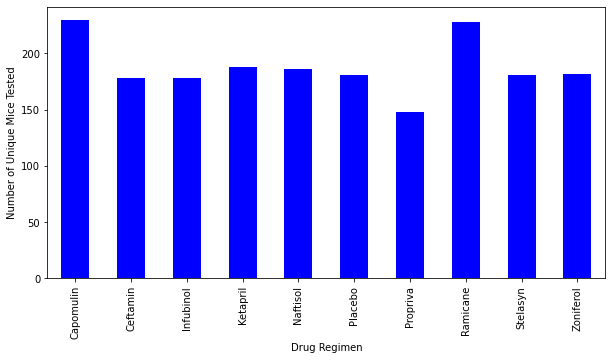

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_mice_per_test = fresh_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = count_mice_per_test.plot.bar(figsize=(10,5), color='b',fontsize = 10)

plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Unique Mice Tested",fontsize = 10)

plt.show()

count_mice_per_test

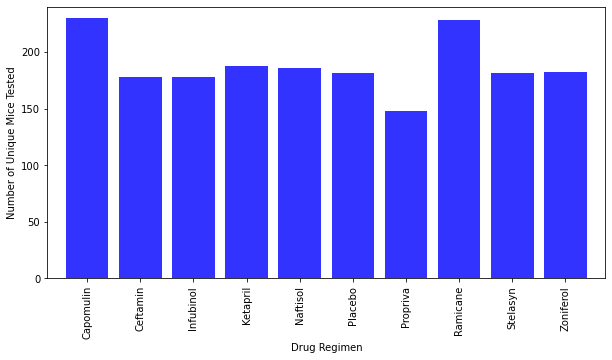

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
mice_list =(fresh_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(count_mice_per_test))
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Unique Mice Tested",fontsize = 10)

plt.show()

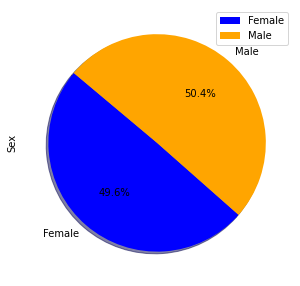

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = fresh_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(gender_group.size())

mice_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

colors = ['blue', 'orange']
explode = (0, 0)
plot = mice_gender.plot.pie(y='Total Count',figsize=(10,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.ylabel('Sex',fontsize = 10)

plt.show()

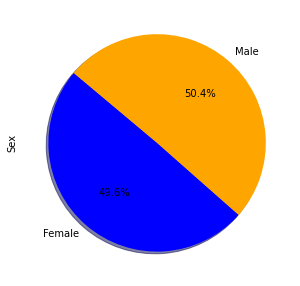

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.6,50.4]

#Set colors for each section of the pie
colors = ['blue', 'orange']

#Determoine which section of the circle to detach
explode = (0, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.ylabel('Sex',fontsize = 10)
#Set equal axis

plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = fresh_df.loc[fresh_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = fresh_df.loc[fresh_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = fresh_df.loc[fresh_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = fresh_df.loc[fresh_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, fresh_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_vol, fresh_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_vol, fresh_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_vol, fresh_df, on=("Mouse ID","Timepoint"),how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = [Capomulin_merge["Tumor Volume (mm3)"], Ramicane_merge["Tumor Volume (mm3)"], Infubinol_merge["Tumor Volume (mm3)"], Ceftamin_merge["Tumor Volume (mm3)"]]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


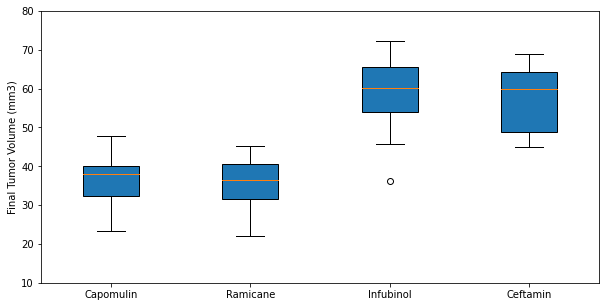

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_merge["Tumor Volume (mm3)"], Ramicane_merge["Tumor Volume (mm3)"], Infubinol_merge["Tumor Volume (mm3)"], Ceftamin_merge["Tumor Volume (mm3)"]]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 10)

ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.show()


## Line and Scatter Plots

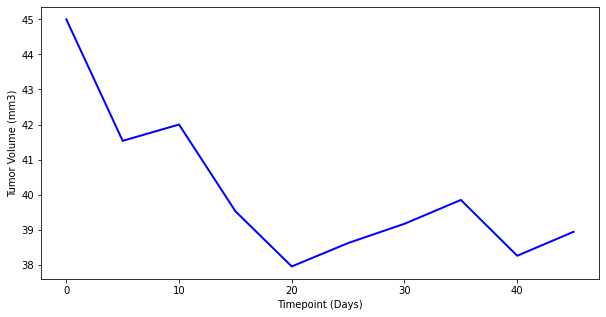

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Cap_plot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]

x_axis = Cap_plot_df["Timepoint"]
volumetu = Cap_plot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.plot(x_axis, volumetu,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =10)
plt.ylabel('Tumor Volume (mm3)',fontsize =10)

plt.show()

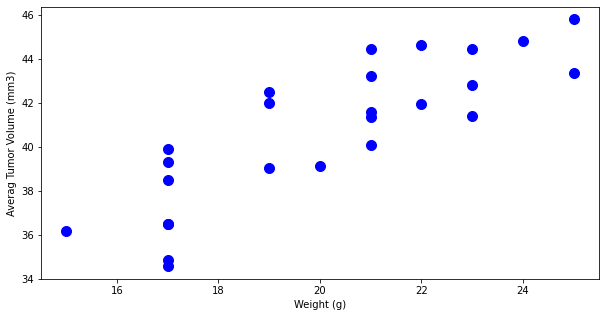

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10, 5))
avg_Cap_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(avg_Cap_vol['Weight (g)'],avg_Cap_vol['Tumor Volume (mm3)'],s=100, color="blue")
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
The r-squared is: 0.7088568047708717


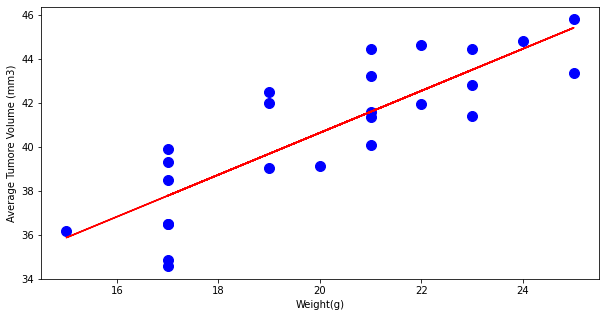

In [40]:
# Calculate the correlation coefficient and linear regression model 
corr=round(st.pearsonr(avg_Cap_vol['Weight (g)'],avg_Cap_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

x_values = avg_Cap_vol['Weight (g)']
y_values = avg_Cap_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=100, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight(g)',fontsize =10)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =10)

print(f"The r-squared is: {rvalue**2}")
# for mouse weight and average tumor volume for the Capomulin regimen